In [122]:
import xlrd
import pylab as pylab
import numpy as np
import matplotlib as mpl
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.interpolate
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
from scipy import asarray as ar,exp
from scipy.optimize import curve_fit
%matplotlib inline 
mpl.rcParams['image.cmap'] = 'jet'
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

mpl.rc('font', **font)


def myfloat(float_string):
    """It takes a float string ("1,23" or "1,234.567.890") and
converts it to floating point number (1.23 or 1.234567890).
"""
    float_string = str(float_string)
    errormsg = "ValueError: Input must be decimal or integer string"
    try:
        if float_string.count(".") == 1 and float_string.count(",") == 0:
            return float(float_string)
        else:
            midle_string = list(float_string)
            while midle_string.count(".") != 0:
                midle_string.remove(".")
            out_string = str.replace("".join(midle_string), ",", ".")
        return float(out_string)
    except ValueError, error:
        print "%s\n%s" %(errormsg, error)
        return None

In [151]:
def read(name):
    workbook= xlrd.open_workbook('Data/gaussian/'+name+'.xlsx')
    sheet_names=workbook.sheet_names()
    #print sheet_names
    promedio_sheet=workbook.sheet_by_name(sheet_names[0])
    timeCol=promedio_sheet.col_values(0)
    powerCol=promedio_sheet.col_values(1)
    posxCol=promedio_sheet.col_values(2)
    posyCol=promedio_sheet.col_values(3)
    w1Col=promedio_sheet.col_values(4)
    w2Col=promedio_sheet.col_values(5)
    w3Col=promedio_sheet.col_values(6)
    v1Col=promedio_sheet.col_values(7)
    v2Col=promedio_sheet.col_values(8)
    v3Col=promedio_sheet.col_values(9)
    for i in range(0,22):
        del timeCol[0]
        del powerCol[0]
        del posxCol[0]
        del posyCol[0]
        del w1Col[0]
        del w2Col[0]
        del w3Col[0]
        del v1Col[0]
        del v2Col[0]
        del v3Col[0]
    return [timeCol,powerCol,posxCol,posyCol,w1Col,w2Col,w3Col,v1Col,v2Col,v3Col]

def listas(name):
    lis=read(name)
    data=[]
    for i in lis:
        #print i
        tem=[]
        for j in i:
            #print j
            tem.append(float(str(j).replace(",",".")))
        #print tem
        data.append(tem)
    return data

In [ ]:
def gaus(x,a,sigma,mu):
    #a=1/(sigma*np.square(2*np.pi))
    
    rta=a*exp(-((((x-mu)/sigma)**2)/2))
    
    return rta

xfit=np.linspace(xw[0],xw[-1])
poptw,pcovw = scipy.optimize.curve_fit(gaus,xw,y)
print poptw
#plt.plot(x,y,'b+:',label='data')
plt.plot(xfit,gaus(xfit,*poptw),'ro:',label='fitw')
plt.plot(xw,y,'go')

plt.legend()

plt.show()

[  9.65751989e-01  -9.18013870e-15   2.24438934e+02]


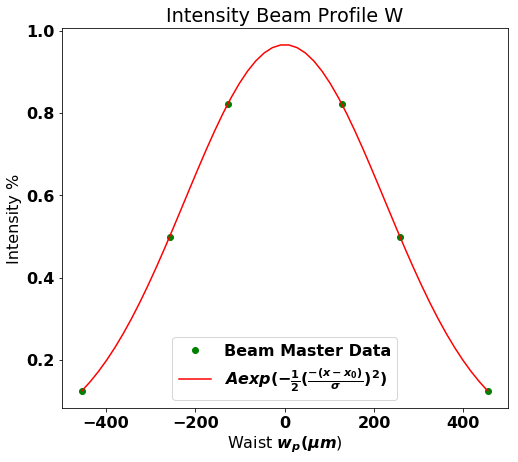

In [330]:
data=listas('0')
w1,w2,w3,v1,v2,v3=np.mean(data[4]),np.mean(data[5]),np.mean(data[6]),np.mean(data[7]),np.mean(data[8]),np.mean(data[9])
xw=np.array([-w1/2,-w2/2,-w3/2,0,w3/2,w2/2,w1/2])
xv=np.array([-v1/2,-v2/2,-v3/2,0,v3/2,v2/2,v1/2])
y = np.array([0.135,0.50,0.80,1,0.80,0.50,0.135])
yfit=np.linspace(y[0],y[-1])
from __future__ import division





# weighted arithmetic mean (corrected - check the section below)
mean = sum(xw * y) / sum(y)
sigma = np.sqrt(sum(y * (xw - mean)**2) / sum(y))


meanv = sum(xv * y) / sum(y)
sigmav = np.sqrt(sum(y * (xv - meanv)**2) / sum(y))

def gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(gauss, xw, y,p0=[1, mean, sigma])
poptv,pcovv = curve_fit(gauss, xv, y,p0=[1, mean, sigma])
xfit=np.linspace(-w1/2,w1/2)
xsin=np.delete(xw,3)
print popt
plt.figure(figsize=(8,7))
#plt.plot(xw, y, 'bo:', label='data')
plt.plot(xsin, gauss(xsin, *popt), 'go', label='Beam Master Data')
plt.plot(xfit, gauss(xfit, *popt), 'r-', label=r'$A exp(-\frac{1}{2}(\frac{-(x-x_0)}{\sigma})^2)$')
plt.legend()
plt.title('Intensity Beam Profile W')
plt.ylabel('Intensity %')
plt.xlabel('Waist $w_p(\mu m$)')
plt.savefig('Data/gaussian/inteW.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()






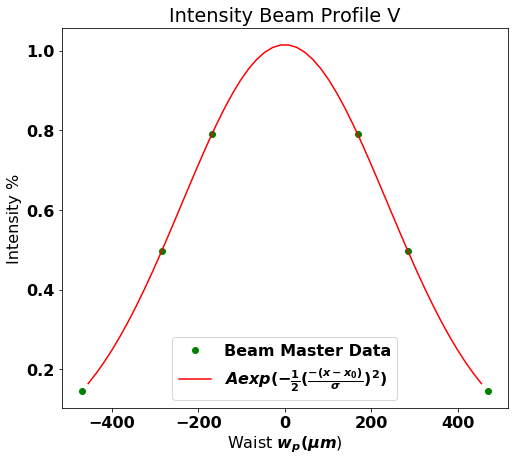

In [332]:
poptv,pcovv = curve_fit(gauss, xv, y,p0=[1, mean, sigma])
xfit=np.linspace(-w1/2,w1/2)
xsin=np.delete(xv,3)
plt.figure(figsize=(8,7))
#plt.plot(xv, y, 'b+:', label='data')
plt.plot(xsin, gauss(xsin, *poptv), 'go', label='Beam Master Data')
plt.plot(xfit, gauss(xfit, *poptv), 'r-', label=r'$A exp(-\frac{1}{2}(\frac{-(x-x_0)}{\sigma})^2)$')
plt.legend()
plt.title('Intensity Beam Profile V')
plt.ylabel('Intensity %')
plt.xlabel('Waist $w_p(\mu m$)')
plt.savefig('Data/gaussian/inteV.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


[ 100.    0.    1.]


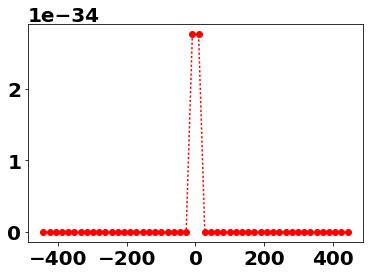

In [103]:
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid**2)

data=listas('sup.close')
w1,w2,w3,v1,v2,v3=np.mean(data[4]),np.mean(data[5]),np.mean(data[6]),np.mean(data[7]),np.mean(data[8]),np.mean(data[9])
xw=ar([-w1/2,-w2/2,-w3/2,0,w3/2,w2/2,w1/2])
xv=ar([-v1/2,-v2/2,-v3/2,0,v3/2,v2/2,v1/2])
y = ar([13.5,50,80,100,80,50,13.5])

x=np.linspace(-w1/2,w1/2)



init_vals = [1, 0, 1]  # for [amp, cen, wid]
best_vals, covar = curve_fit(gaussian, xw, y, p0=init_vals)
print(best_vals)



plt.plot(x,gaussian(x,best_vals[0],best_vals[1],best_vals[2]),'ro:',label='fitw')

In [24]:
float('314,2'.replace(".","").replace(",","."))

314.2

In [111]:
def propagation(names):
    dats=[]
    for i in names:
        print 
        temp=[]
        for j in listas(i):
            temp.append(np.mean(j))
        dats.append(temp)
    return dats
    

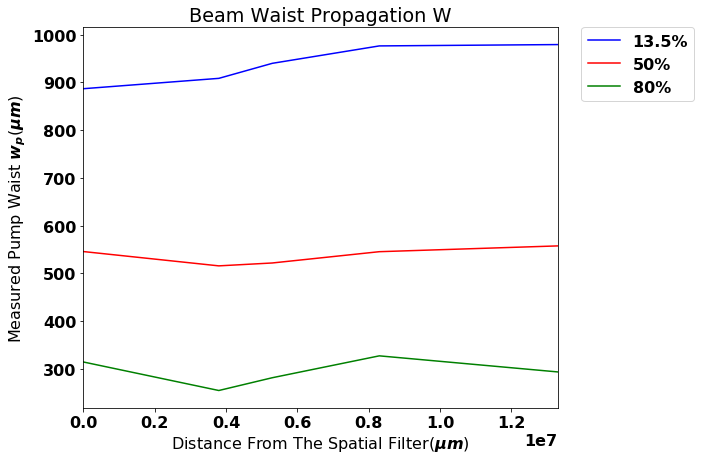

In [217]:
dats=propagation(['sup.close','0','15','30','55'])
x=[0,38e5,53e5,83e5,133e5]
ww1=[dats[0][4],dats[1][4],dats[2][4],dats[3][4],dats[4][4]]
ww2=[dats[0][5],dats[1][5],dats[2][5],dats[3][5],dats[4][5]]
ww3=[dats[0][6],dats[1][6],dats[2][6],dats[3][6],dats[4][6]]
plt.figure(figsize=(8.5,7))
plt.title('Beam Waist Propagation W')
plt.xlabel('Distance From The Spatial Filter($\mu m$)')
plt.ylabel('Measured Pump Waist $w_p$($\mu m$)')
plt.xlim(0,133e5)
plt.plot(x,ww1,'b',label='13.5%')
plt.plot(x,ww2,'r',label='50%')
plt.plot(x,ww3,'g',label='80%')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Data/gaussian/propagationW.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

[899.88333333333333, 937.58333333333337, 960.2166666666667, 998.83333333333337, 1074.3333333333333]


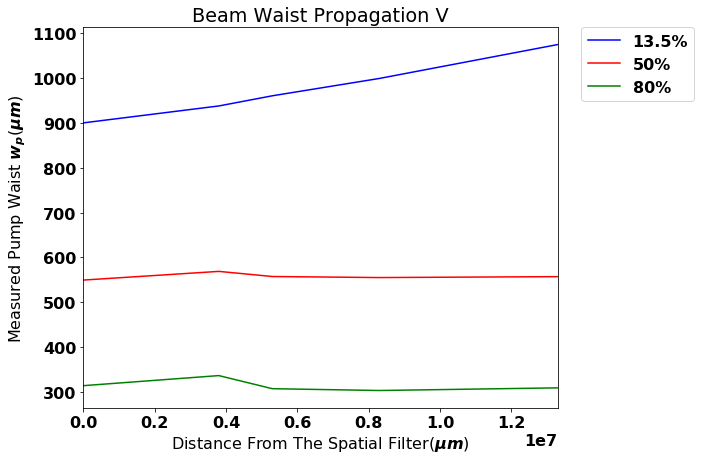

In [218]:
dats=propagation(['sup.close','0','15','30','55'])
x=[0,38e5,53e5,83e5,133e5]
wv1=[dats[0][7],dats[1][7],dats[2][7],dats[3][7],dats[4][7]]
wv2=[dats[0][8],dats[1][8],dats[2][8],dats[3][8],dats[4][8]]
wv3=[dats[0][6],dats[1][9],dats[2][9],dats[3][9],dats[4][9]]
print wv1
plt.figure(figsize=(8.5,7))
plt.title('Beam Waist Propagation V')
plt.xlabel('Distance From The Spatial Filter($\mu m$)')
plt.ylabel('Measured Pump Waist $w_p$($\mu m$)')
plt.xlim(0,133e5)
plt.plot(x,wv1,'b',label='13.5%')
plt.plot(x,wv2,'r',label='50%')
plt.plot(x,wv3,'g',label='80%')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Data/gaussian/propagationV.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [219]:
p=listas('30')
print p

[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [4081.0, 4081.0, 4081.0, 4082.0, 4082.0, 4082.0], [117.9, 117.7, 117.6, 117.7, 117.4, 117.4], [152.0, 152.1, 152.1, 152.1, 152.1, 152.3], [976.1, 976.4, 978.2, 978.3, 975.4, 974.1], [545.4, 545.3, 545.4, 545.0, 545.7, 545.6], [326.7, 327.0, 327.9, 327.2, 327.3, 327.3], [1001.0, 1001.0, 1000.0, 997.7, 997.8, 995.5], [554.3, 554.8, 555.9, 555.8, 555.5, 555.3], [304.2, 303.7, 303.9, 303.9, 303.1, 303.1]]


0.999765745483
0.862211278751
0.539320601689


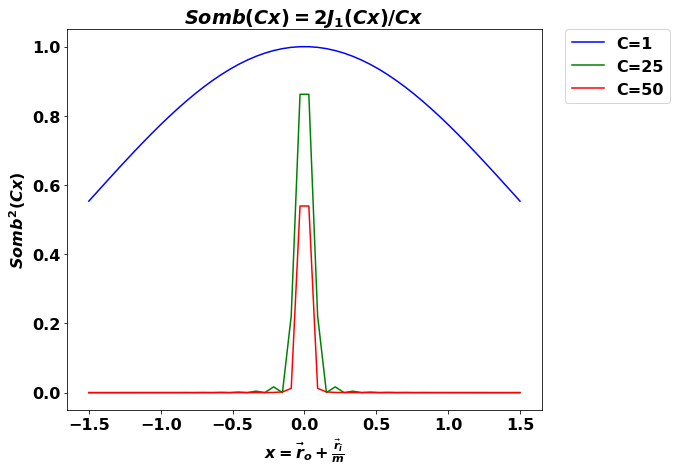

In [220]:
x=np.linspace(-1.5,1.5)
c1=1
c2=25
c3=50

y1=(2*(scipy.special.jv(1,c1*x))/(c1*x))**2
y2=(2*(scipy.special.jv(1,c2*x))/(c2*x))**2
y3=(2*(scipy.special.jv(1,c3*x))/(c3*x))**2
print np.amax(y1)
print np.amax(y2)
print np.amax(y3)
plt.figure(figsize=(8.5,7))
plt.title('$Somb(Cx)=2J_1(Cx)/Cx$')
plt.xlabel(r'$x=\vec{r}_o +\frac{\vec{r}_i}{m}$')
plt.ylabel(r'$Somb^2(Cx)$')
plt.plot(x,y1,'b',label='C='+str(c1))
plt.plot(x,y2,'g',label='C='+str(c2))
plt.plot(x,y3,'r',label='C='+str(c3))
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Data/bessel.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

[  9.20089545e+02   1.23829528e-01]


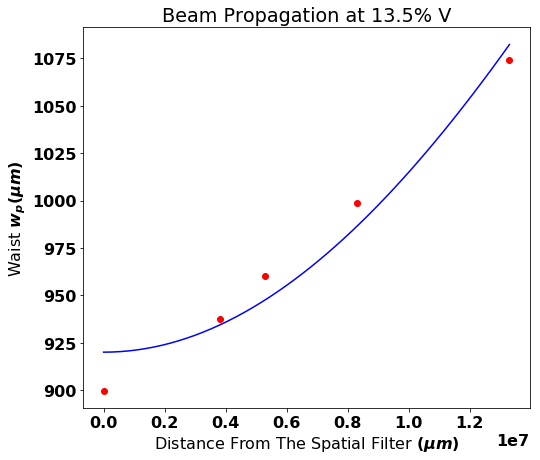

In [313]:
def w(z,w0,l0):
    zr=(np.pi*(w0**2))/l0
    return w0*np.sqrt((1+((z/zr)**2)))

                      
                      
                    
x=[0,38e5,53e5,83e5,133e5]  
z=np.linspace(x[0],x[-1]) 
wv1=[dats[0][7],dats[1][7],dats[2][7],dats[3][7],dats[4][7]]
wv2=[dats[0][8],dats[1][8],dats[2][8],dats[3][8],dats[4][8]]
wv3=[dats[0][6],dats[1][9],dats[2][9],dats[3][9],dats[4][9]] 

opt,cov= scipy.optimize.curve_fit(w,x,wv1,p0=[wv1[0],0.405]) 
opt2,cov2= scipy.optimize.curve_fit(w,x,wv2,p0=[wv2[0],0.405])
opt3,cov3= scipy.optimize.curve_fit(w,x,wv3,p0=[wv3[0],0.405])
print opt
plt.figure(figsize=(8,7))
plt.title('Beam Propagation at 13.5% V')
plt.ylabel('Waist $w_p(\mu m)$')
plt.xlabel('Distance From The Spatial Filter $(\mu m)$')
plt.plot(x,wv1,'ro')
plt.plot(z,w(z,opt[0],opt[1]),'b')
plt.savefig('Data/gaussian/proV.png', bbox_extra_artists=(lgd,), bbox_inches='tight')



#bounds=(x[0], x[-1])

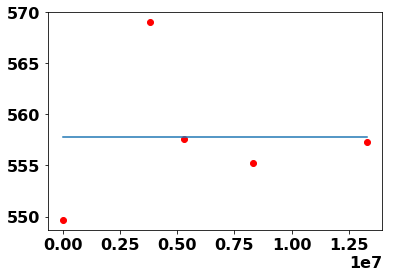

In [237]:
            
plt.plot(x,wv2,'ro')
plt.plot(z,w(z,opt2[0],opt2[1]))      
                      

                      

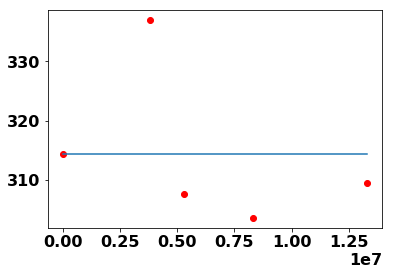

In [238]:
plt.plot(x,wv3,'ro')
plt.plot(z,w(z,opt3[0],opt3[1]))

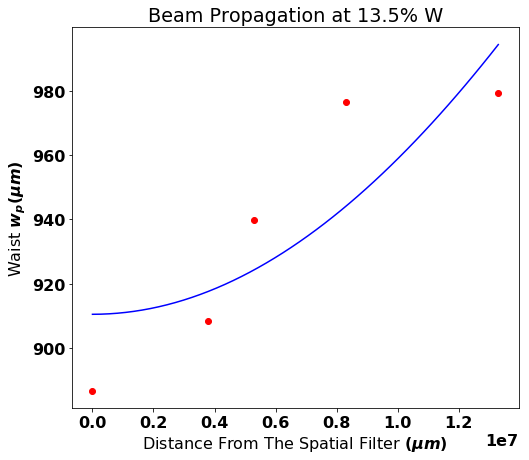

In [312]:
def w(z,w0,l0):
    zr=(np.pi*(w0**2))/l0
    return w0*np.sqrt((1+((z/zr)**2)))

                      
                      
                    
x=[0,38e5,53e5,83e5,133e5]  
z=np.linspace(x[0],x[-1])
ww1=[dats[0][4],dats[1][4],dats[2][4],dats[3][4],dats[4][4]]
ww2=[dats[0][5],dats[1][5],dats[2][5],dats[3][5],dats[4][5]]
ww3=[dats[0][6],dats[1][6],dats[2][6],dats[3][6],dats[4][6]]
opt,cov= scipy.optimize.curve_fit(w,x,ww1,p0=[ww1[0],0.405]) 
opt2,cov2= scipy.optimize.curve_fit(w,x,ww2,p0=[ww2[0],0.405])
opt3,cov3= scipy.optimize.curve_fit(w,x,ww3,p0=[ww3[0],0.405])
plt.figure(figsize=(8,7))
plt.title('Beam Propagation at 13.5% W')
plt.ylabel('Waist $w_p(\mu m)$')
plt.xlabel('Distance From The Spatial Filter $(\mu m)$')
plt.plot(x,ww1,'ro')
plt.plot(z,w(z,opt[0],opt[1]),'b')
plt.savefig('Data/gaussian/proW.png', bbox_extra_artists=(lgd,), bbox_inches='tight')


                      

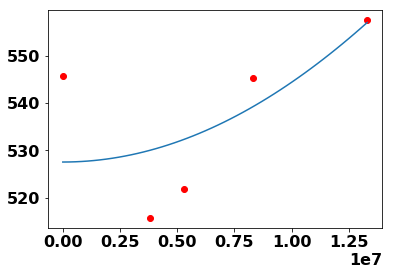

In [280]:
plt.plot(x,ww2,'ro')
plt.plot(z,w(z,opt2[0],opt2[1]))

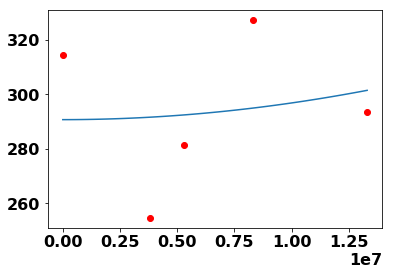

In [281]:
plt.plot(x,ww3,'ro')
plt.plot(z,w(z,opt3[0],opt3[1]))

In [311]:
p=np.array([1,2,3])
print np.delete(p,1)[0]

1
